In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine as cos_dist
import re

In [229]:
text = open('sentences.txt', 'r')
sentences = text.read().lower().split('\n')[:-1]

In [230]:
for i in range(len(sentences)):
    sentences[i] =[x for x in re.split('[^a-z]', sentences[i]) if x]


In [231]:
all_words = set([g for i in sentences for g in i])

In [233]:
words = dict(zip(list(range(len(all_words))),all_words))

In [234]:
word_counts = np.zeros((len(sentences),len(all_words)))

In [235]:
for i in range(len(sentences)):
    for j in words.keys():
        word_counts[i][j] = sentences[i].count(words[j])

In [236]:
dist = {}
for i in range(1,len(word_counts)):
    dist[i] = cos_dist(word_counts[0],word_counts[i])

In [237]:
with open('submission-1.txt', 'w') as f:
    for item in sorted(dist.values())[:2]:
        f.write("%s " % item)

Task 2

In [238]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

In [239]:
X = np.arange(1,15,0.1)

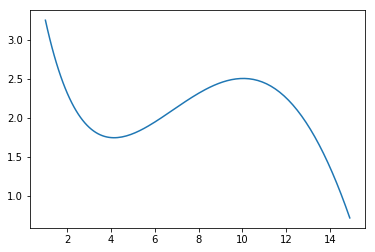

In [240]:
plt.plot(X,f(X))
plt.show()

In [241]:
n=1
x = np.array([1,15])
M = np.array([x**i for i in range(0,n+1)])
b = np.array(f(x))
P = np.linalg.solve(M,b)

In [242]:
P

array([ 3.43914511, -0.18692825])

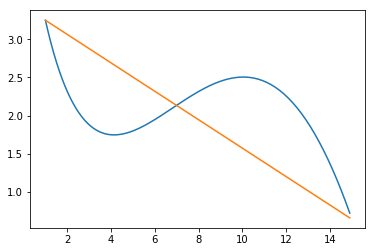

In [243]:
plt.plot(X,f(X))
plt.plot(X,P[0]*X**0+P[1]*X**1)
plt.show()

In [244]:
n=2
x = np.array([1,8,15])
M = np.array([x**i for i in range(0,n+1)])
b = np.array(f(x))
P = np.linalg.solve(M, b)

In [245]:
P

array([ 3.44519726, -0.25223983,  0.05925944])

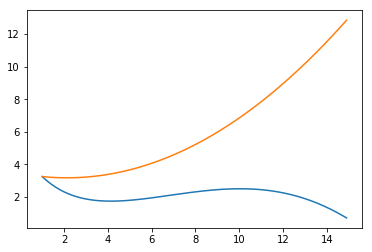

In [246]:
plt.plot(X,f(X))
plt.plot(X,P[0]*X**0+P[1]*X**1+P[2]*X**2)
plt.show()

In [247]:
n=3
x = np.array([1,4,10,15])
M = np.array([x**i for i in range(0,n+1)]).T
b = np.array(f(x))
P = np.linalg.solve(M, b)

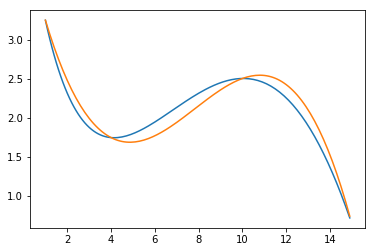

In [248]:
plt.plot(X,f(X))
plt.plot(X,P[0]+X*P[1]+P[2]*X**2+P[3]*X**3)
plt.show()

In [249]:
P

array([ 4.36264154, -1.29552587,  0.19333685, -0.00823565])

In [250]:
with open('submission-2.txt', 'w') as f:
    for item in P:
        f.write("%s " % item)